E:\python\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


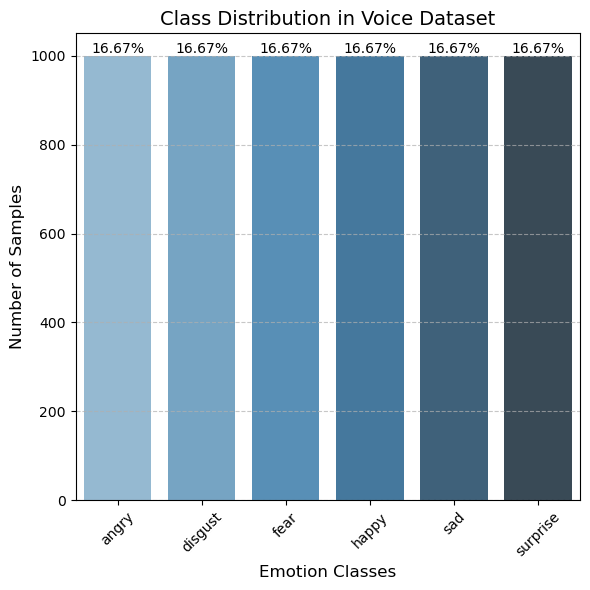

Class Distribution (Number of Samples and Percentage):
angry: 1000 samples, 16.67%
disgust: 1000 samples, 16.67%
fear: 1000 samples, 16.67%
happy: 1000 samples, 16.67%
sad: 1000 samples, 16.67%
surprise: 1000 samples, 16.67%


In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the main folder
data_path = 'F:/MS Thesis/Research/Voice'

# Get the list of subfolders (classes)
subfolders = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]

# Count the number of files in each subfolder
class_counts = {}
for subfolder in subfolders:
    folder_path = os.path.join(data_path, subfolder)
    file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    class_counts[subfolder] = file_count

# Calculate the total number of samples
total_samples = sum(class_counts.values())

# Calculate percentages
class_percentage = {k: (v / total_samples) * 100 for k, v in class_counts.items()}

# Plot the class distribution as a bar chart with counts
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    x=list(class_counts.keys()), 
    y=list(class_counts.values()), 
    palette='Blues_d'
)
plt.title('Class Distribution in Voice Dataset', fontsize=14)
plt.xlabel('Emotion Classes', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentage labels on top of the bars
for p in ax.patches:
    count = p.get_height()  # Get count value for each bar
    percentage = (count / total_samples) * 100  # Calculate percentage
    ax.annotate(f'{percentage:.2f}%',  # Display percentage with 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Print class distribution (number of samples and percentage)
print("Class Distribution (Number of Samples and Percentage):")
for emotion, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{emotion}: {count} samples, {percentage:.2f}%")


Extracting features from audio files.


Processing surprise: 100%|█████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.63it/s]


Feature extraction complete. Features and labels saved.


C:\Users\Tazbin\AppData\Local\Temp\ipykernel_10972\159935780.py:77: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


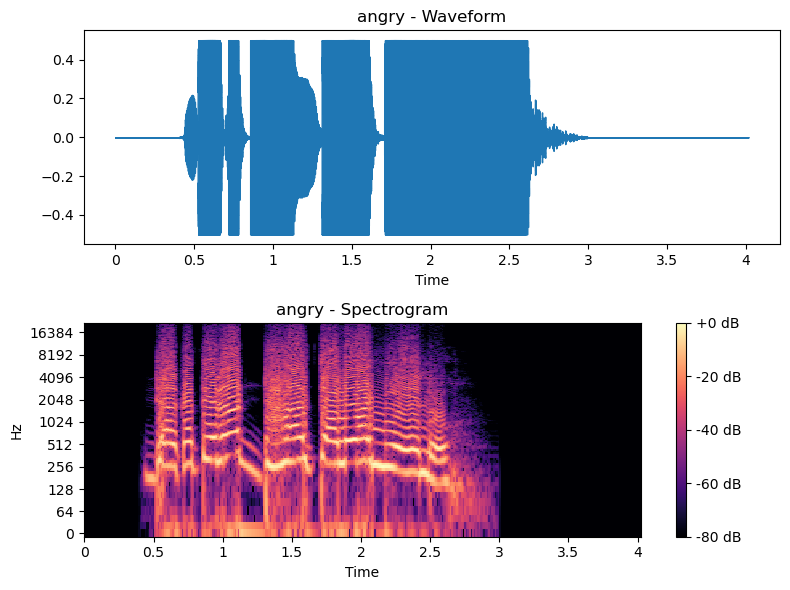

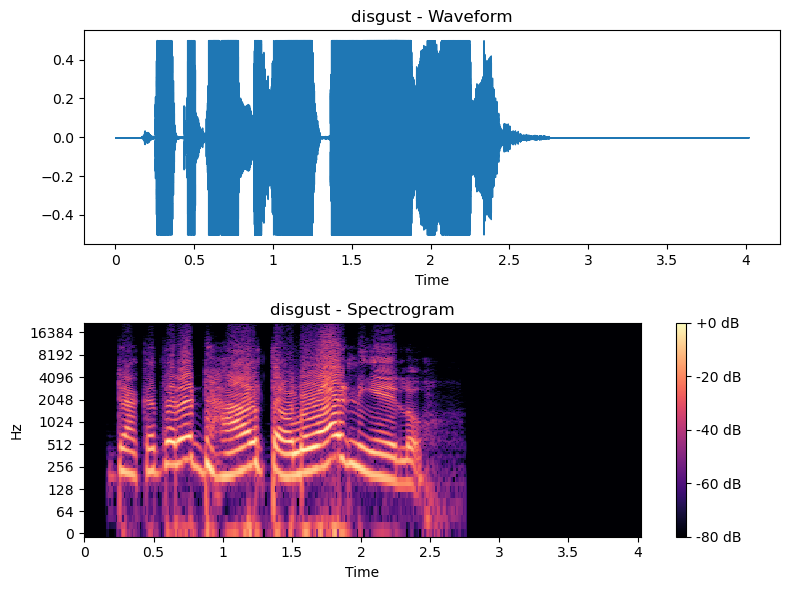

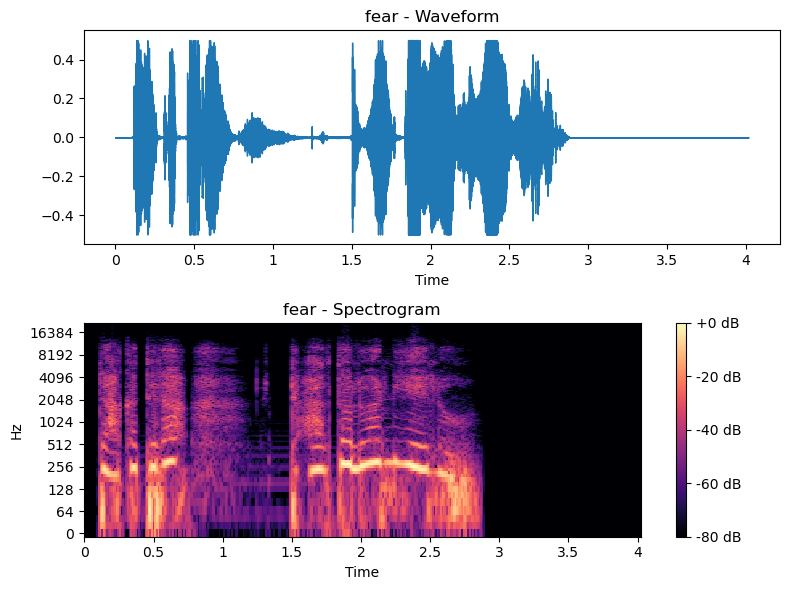

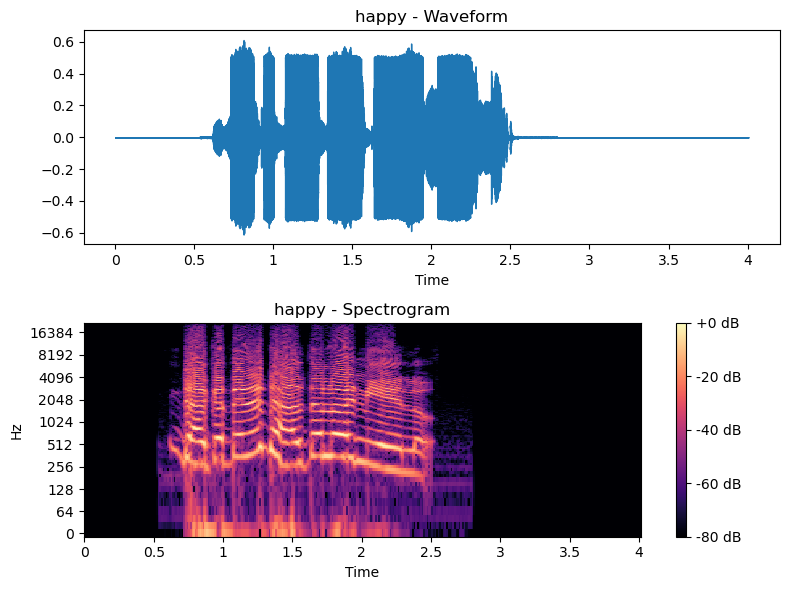

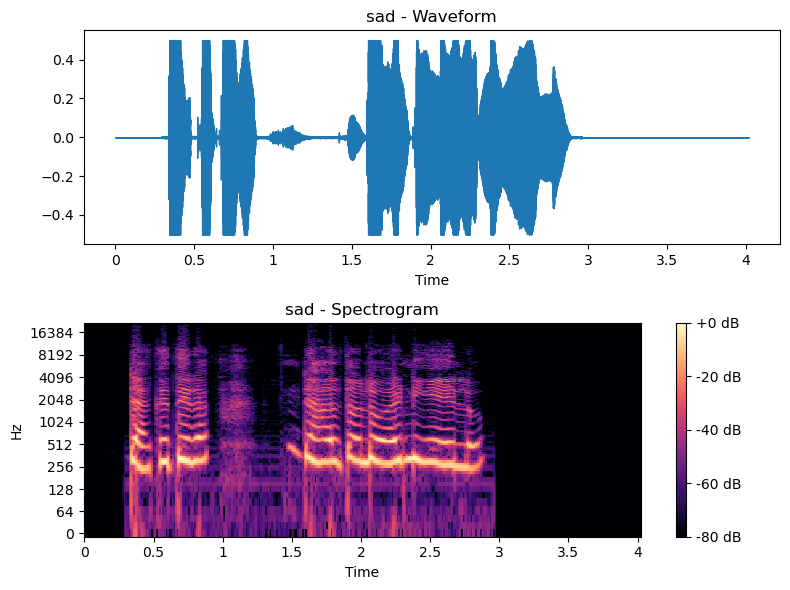

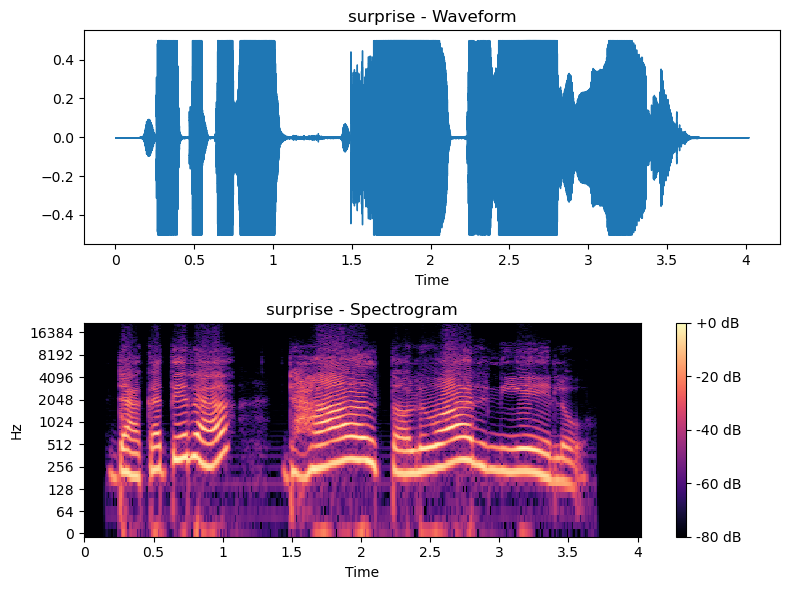

In [8]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm

# Path to your dataset and features folder
data_path = 'F:/MS Thesis/Research/Voice'
features_path = 'F:/MS Thesis/Research/Data'  # Ensure this exists

# Function to extract MFCC features from audio files
def extract_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc.T, axis=0)  # Return mean MFCC over time

# Function to load or extract data
def load_or_extract_data(data_path, features_path):
    features_file = os.path.join(features_path, 'features.npy')
    labels_file = os.path.join(features_path, 'labels.npy')
    
    # Check if the features and labels are already saved
    if os.path.exists(features_file) and os.path.exists(labels_file):
        print("Loading pre-extracted features and labels.")
        features = np.load(features_file)
        labels = np.load(labels_file)
    else:
        print("Extracting features from audio files.")
        labels = []
        features = []
        
        for emotion in os.listdir(data_path):
            emotion_folder = os.path.join(data_path, emotion)
            if os.path.isdir(emotion_folder):
                for file in tqdm(os.listdir(emotion_folder), desc=f"Processing {emotion}"):
                    if file.endswith('.wav'):
                        file_path = os.path.join(emotion_folder, file)
                        features.append(extract_features(file_path))
                        labels.append(emotion)

        features = np.array(features)
        labels = np.array(labels)

        # Save features and labels for future use
        np.save(features_file, features)
        np.save(labels_file, labels)
    
    print("Feature extraction complete. Features and labels saved.")
    return features, labels

# Run feature extraction
features, labels = load_or_extract_data(data_path, features_path)

# Visualize waveform and spectrogram for each class
def plot_waveform_and_spectrogram_for_all_classes(data_path):
    # List all emotion classes (folders in the data_path)
    emotion_classes = [emotion for emotion in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, emotion))]
    
    for emotion_class in emotion_classes:
        # Find an audio file for the given emotion class
        emotion_folder = os.path.join(data_path, emotion_class)
        if os.path.isdir(emotion_folder):
            for file in os.listdir(emotion_folder):
                if file.endswith('.wav'):
                    file_path = os.path.join(emotion_folder, file)
                    y, sr = librosa.load(file_path, sr=None)

                    # Plot waveform
                    plt.figure(figsize=(8, 6))
                    plt.subplot(2, 1, 1)
                    librosa.display.waveshow(y, sr=sr)
                    plt.title(f'{emotion_class} - Waveform')

                    # Plot spectrogram
                    plt.subplot(2, 1, 2)
                    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
                    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
                    plt.title(f'{emotion_class} - Spectrogram')
                    plt.colorbar(format='%+2.0f dB')

                    plt.tight_layout()
                    plt.show()
                    break  # Plot only the first file for each emotion class

# Plot waveform and spectrogram for all emotion classes
plot_waveform_and_spectrogram_for_all_classes(data_path)


Plotting MFCC for F:/MS Thesis/Research/Voice\angry\F_01_OISHI_S_10_ANGRY_1.wav (Emotion: angry)


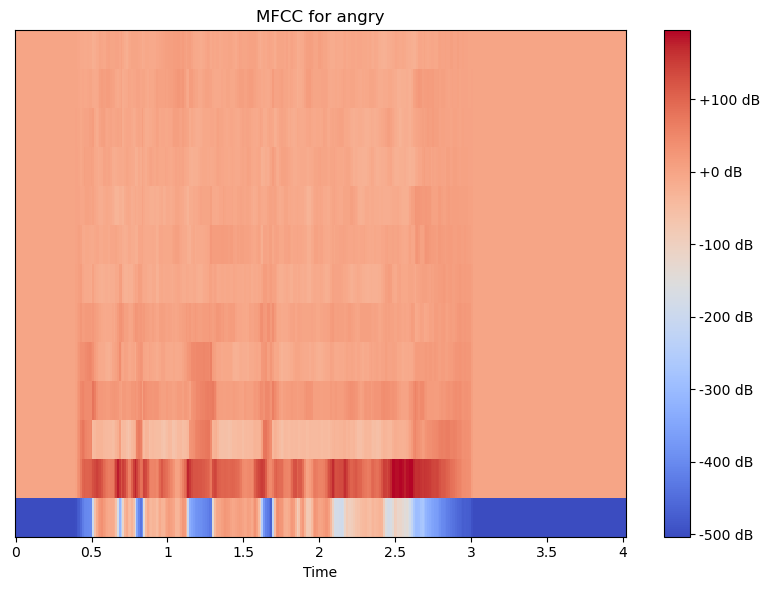

Plotting MFCC for F:/MS Thesis/Research/Voice\disgust\F_01_OISHI_S_10_DISGUST_1.wav (Emotion: disgust)


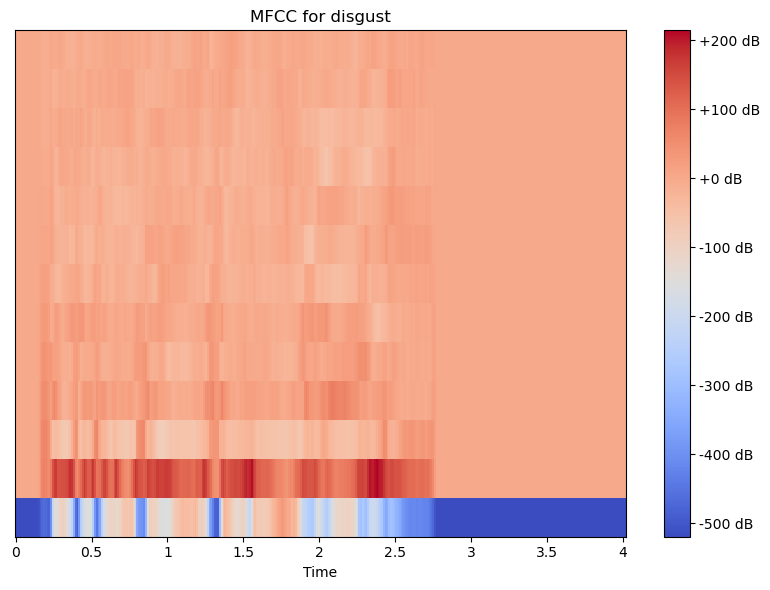

Plotting MFCC for F:/MS Thesis/Research/Voice\fear\F_01_OISHI_S_10_FEAR_1.wav (Emotion: fear)


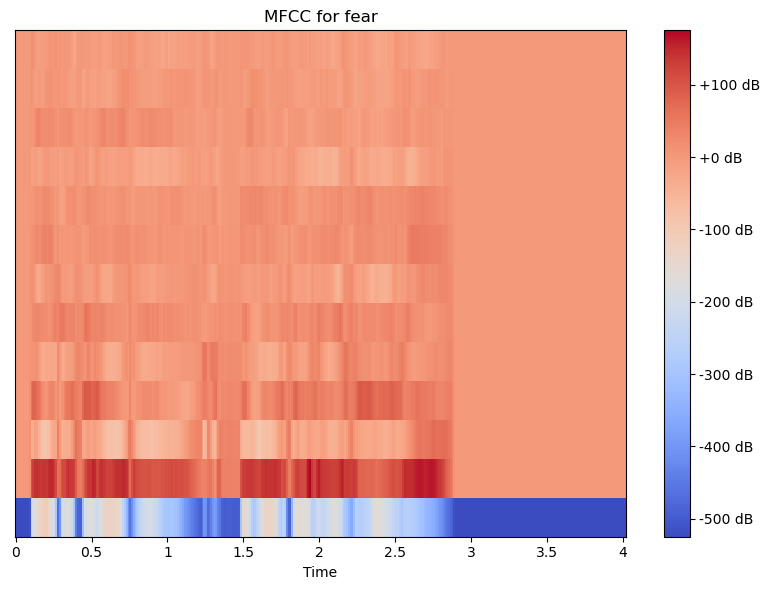

Plotting MFCC for F:/MS Thesis/Research/Voice\happy\F_01_OISHI_S_10_HAPPY_1.wav (Emotion: happy)


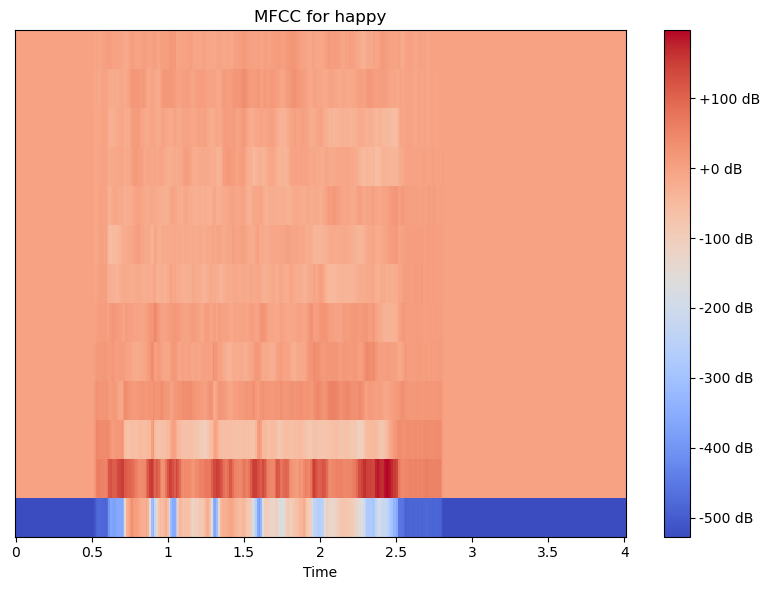

Plotting MFCC for F:/MS Thesis/Research/Voice\sad\F_01_OISHI_S_10_SAD_1.wav (Emotion: sad)


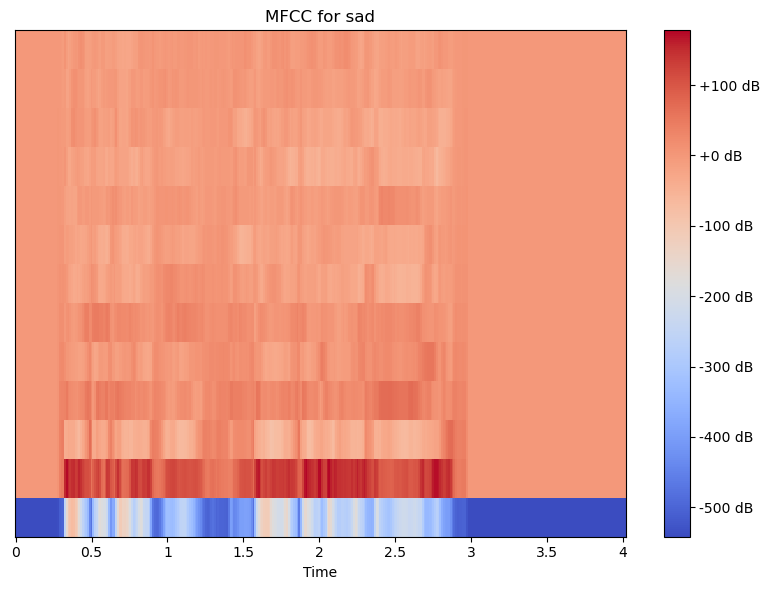

Plotting MFCC for F:/MS Thesis/Research/Voice\surprise\F_01_OISHI_S_10_SURPRISE_1.wav (Emotion: surprise)


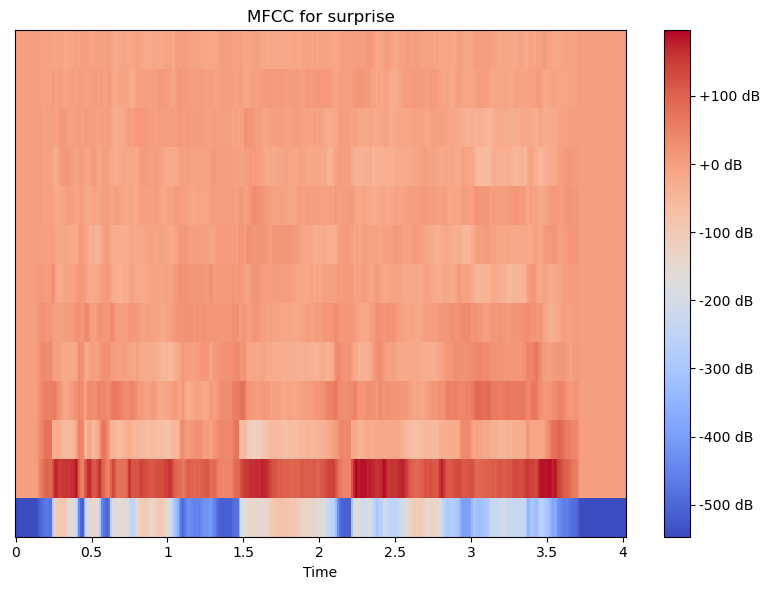

In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Paths to your dataset and features folder
data_path = 'F:/MS Thesis/Research/Voice'
features_path = 'F:/MS Thesis/Research/Data'

# Function to plot MFCC for a given audio file
def plot_mfcc(file_path, emotion):
    print(f"Plotting MFCC for {file_path} (Emotion: {emotion})")
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return  # Exit if there's an error loading the file

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Plot the MFCC
    plt.figure(figsize=(8, 6))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.title(f'MFCC for {emotion}')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

    # Save or show the plot
    output_path = os.path.join(features_path, f'mfcc_{emotion}.png')
    try:
        plt.show()
    except Exception as e:
        print(f"Error displaying plot: {e}")
        plt.savefig(output_path)
        print(f"Plot saved as {output_path}")

# Ensure the features_path exists
if not os.path.exists(features_path):
    os.makedirs(features_path)

# Iterate through each emotion folder and plot MFCC for one file
for emotion in os.listdir(data_path):
    emotion_folder = os.path.join(data_path, emotion)
    if os.path.isdir(emotion_folder):  # Ensure it's a folder
        # Get one .wav file from the emotion folder
        files = [f for f in os.listdir(emotion_folder) if f.endswith('.wav')]
        if files:
            file_path = os.path.join(emotion_folder, files[0])  # Select the first file
            plot_mfcc(file_path, emotion)
        else:
            print(f"No .wav files found in {emotion_folder}")


Extracted Features Shape: (6000, 13)
First Sample's Features: [-2.7467349e+02  6.7173111e+01 -8.7733450e+00  1.6224020e+01
  2.6043081e+00  5.3328586e+00 -3.6684940e+00 -9.0457529e-02
 -3.3079493e+00 -3.6673391e+00 -2.3508866e+00  1.3884276e-01
 -2.0996244e+00]


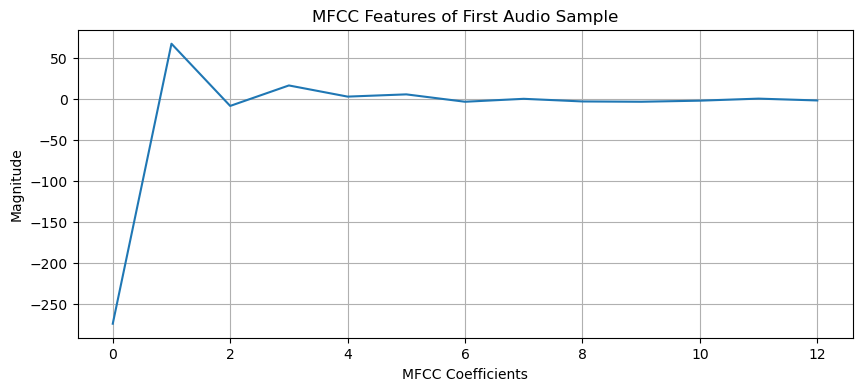

In [5]:
import matplotlib.pyplot as plt

# Display extracted features
print("Extracted Features Shape:", features.shape)
print("First Sample's Features:", features[0])  # Print the first audio file's features

# Visualize the MFCCs of the first sample
plt.figure(figsize=(10, 4))
plt.plot(features[0])
plt.title("MFCC Features of First Audio Sample")
plt.xlabel("MFCC Coefficients")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

# Load the extracted features
features = np.load('F:/MS Thesis/Research/Data/features.npy') 

# Create a DataFrame to represent the features
mfcc_df = pd.DataFrame(features, columns=[f"MFCC {i}" for i in range(features.shape[1])])

# Display the first 10 samples for visualization
display(HTML(mfcc_df.head(10).to_html(index=True)))

,MFCC 0,MFCC 1,MFCC 2,MFCC 3,MFCC 4,MFCC 5,MFCC 6,MFCC 7,MFCC 8,MFCC 9,MFCC 10,MFCC 11,MFCC 12
0,-274.673492,67.173111,-8.773345,16.224020,2.604308,5.332859,-3.668494,-0.090458,-3.307949,-3.667339,-2.350887,0.138843,-2.099624
1,-265.442352,64.956253,-11.825397,19.954823,1.774689,3.275189,-3.958970,-0.688041,-3.026836,-4.029667,-5.050658,-1.044289,-0.842235
2,-267.606140,61.581379,-11.461683,17.784397,0.539827,3.530377,-3.687532,-0.084403,-2.878630,-4.337657,-3.159480,-0.385183,-1.660918
3,-283.617676,67.939362,-9.389298,19.101889,1.095124,4.803241,-2.881802,-0.785905,-2.800735,-6.230289,-5.757318,-0.818873,-1.588639
4,-241.176712,83.843262,-14.110450,17.051970,1.603336,9.092083,-1.340939,2.823827,-1.240975,-7.454979,-4.929646,-0.148592,-0.685008
5,-358.582764,78.711281,-15.111757,27.200363,1.600362,11.778247,-8.932906,-3.606706,-2.995842,-8.073374,-7.340833,-0.640823,-5.352998
6,-292.157623,87.732079,-16.114624,27.555639,3.130512,12.488775,-9.668373,-3.115982,-2.539719,-7.382861,-7.950160,-2.216202,-6.325205
7,-299.300629,74.486107,-7.779550,31.257778,3.598536,13.302363,-7.754526,-0.578668,-3.076977,-7.826429,-7.684542,-2.795609,-6.350510
8,-202.714508,72.235146,-21.102161,29.537489,0.564127,7.720511,-10.368511,-1.902367,-4.141538,-7.211697,-7.043659,-3.049550,-7.353411
9,-288.970856,75.209618,-18.657404,29.868057,-2.047840,11.011370,-10.717289,-2.641299,-4.376307,-8.929112,-6.775089,-3.724834,-7.389851


In [5]:
import pandas as pd
from IPython.display import display, HTML

# Create a DataFrame with MFCC feature descriptions
mfcc_table = pd.DataFrame({
    "Index": list(range(13)),
    "Feature Name": [
        "MFCC 0 (Energy/Intercept)",
        "MFCC 1 (Spectral Slope)",
        "MFCC 2 (Spectral Curvature)",
        "MFCC 3 (Spectral Sharpness)",
        "MFCC 4 (Brightness/High Freq)",
        "MFCC 5 (Spectral Flatness)",
        "MFCC 6 (Spectral Roll-off)",
        "MFCC 7 (Spectral Centroid)",
        "MFCC 8 (Spectral Spread)",
        "MFCC 9 (Spectral Flux)",
        "MFCC 10 (Spectral Entropy)",
        "MFCC 11 (Spectral Contrast)",
        "MFCC 12 (Spectral Roughness)"
    ],
    "Description": [
        "Overall signal energy or loudness",
        "Tilt or slope of the spectrum",
        "Curvature in the spectrum (higher variations)",
        "Sharpness of spectral peaks",
        "Dominance of high-frequency components",
        "Flatness or smoothness of the spectral shape",
        "Frequency below which 95% of energy is found",
        "Center of mass of the spectrum (brightness)",
        "Spread of the spectrum",
        "Rate of spectral change over time",
        "Randomness in the spectrum",
        "Difference between peaks and valleys",
        "Irregularities or roughness in the spectrum"
    ]
})

# Display the table in the notebook
display(HTML(mfcc_table.to_html(index=False)))


Index,Feature Name,Description
0,MFCC 0 (Energy/Intercept),Overall signal energy or loudness
1,MFCC 1 (Spectral Slope),Tilt or slope of the spectrum
2,MFCC 2 (Spectral Curvature),Curvature in the spectrum (higher variations)
3,MFCC 3 (Spectral Sharpness),Sharpness of spectral peaks
4,MFCC 4 (Brightness/High Freq),Dominance of high-frequency components
5,MFCC 5 (Spectral Flatness),Flatness or smoothness of the spectral shape
6,MFCC 6 (Spectral Roll-off),Frequency below which 95% of energy is found
7,MFCC 7 (Spectral Centroid),Center of mass of the spectrum (brightness)
8,MFCC 8 (Spectral Spread),Spread of the spectrum
9,MFCC 9 (Spectral Flux),Rate of spectral change over time
